# WhatsApp Chat Analysis

You can use your WhatsApp data for many data science tasks like sentiment analysis, keyword extraction, named entity recognition, text analysis and several other natural language processing tasks. It also depends on who you are analyzing your WhatsApp messages with because you can find a lot of information from your WhatsApp messages which can also help you to solve business problems.

Before starting with the task of WhatsApp Chat analysis with Python you need to extract your WhatsApp data from your smartphone which is a very easy task. To extract your WhatsApp chats, just open any chat with a person or a group and follow the steps mentioned below:

If you are having an iPhone then tap on the Contact Name or the Group Name. In case you are having an Android smartphone then tap on the 3 dots above.
- Then scroll to the bottom and top on Export Chat.
- Then select without media for simplicity if it asks you whether you want your chats with or without media.
- Then email this chat to yourself and download it to your system.
So this is how you can easily get your WhatsApp chats with any person or a group for the task of WhatsApp chat analysis.

## Step 1: Load the Chat Data

In [21]:
dummy_chat = """
12/12/2022, 10:12 AM - John Doe: Hey, how are you doing?
12/12/2022, 10:15 AM - Jane Smith: I'm good, thanks! How about you?
12/12/2022, 10:16 AM - John Doe: I'm doing well. Just working on a new project.
12/12/2022, 10:18 AM - Jane Smith: That sounds interesting. What's the project about?
12/12/2022, 10:20 AM - John Doe: It's a data analysis project. I'm analyzing some chat data.
12/12/2022, 10:25 AM - Jane Smith: Oh, nice! Anything I can help with?
12/12/2022, 10:30 AM - John Doe: Actually, yes! Could you send me some of your chat data?
12/12/2022, 10:35 AM - Jane Smith: Sure, I'll send it over in a bit.
12/12/2022, 10:40 AM - John Doe: Thanks! That would be really helpful.
12/12/2022, 11:00 AM - Jane Smith: Just sent it to your email.
12/12/2022, 11:05 AM - John Doe: Got it. Thanks a lot!
12/12/2022, 11:10 AM - Jane Smith: No problem. Good luck with your project!
12/12/2022, 11:15 AM - John Doe: Thanks!
"""

# Save the dummy chat to a text file
with open('dummy_whatsapp_chat.txt', 'w') as file:
    file.write(dummy_chat.strip())


In [22]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('textblob')

In [23]:
# Function to read WhatsApp chat data
def load_chat_data(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        data = file.read()
    return data

# Load the chat data
filepath = 'dummy_whatsapp_chat.txt'
chat_data = load_chat_data(filepath)

# Preview the first few lines of the data
print(chat_data[:500])


12/12/2022, 10:12 AM - John Doe: Hey, how are you doing?
12/12/2022, 10:15 AM - Jane Smith: I'm good, thanks! How about you?
12/12/2022, 10:16 AM - John Doe: I'm doing well. Just working on a new project.
12/12/2022, 10:18 AM - Jane Smith: That sounds interesting. What's the project about?
12/12/2022, 10:20 AM - John Doe: It's a data analysis project. I'm analyzing some chat data.
12/12/2022, 10:25 AM - Jane Smith: Oh, nice! Anything I can help with?
12/12/2022, 10:30 AM - John Doe: Actually, ye


## Step 2: Preprocess the Chat Data

In [24]:
def preprocess_chat_data(chat_data):
    messages = []
    pattern = re.compile(r'(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2} [APM]{2}) - (.*?): (.*)')
    for line in chat_data.split('\n'):
        match = pattern.match(line)
        if match:
            date, time, sender, message = match.groups()
            messages.append([date, time, sender, message])
    df = pd.DataFrame(messages, columns=['Date', 'Time', 'Sender', 'Message'])
    return df

# Preprocess the chat data
df_chat = preprocess_chat_data(chat_data)

# Convert Date column to datetime
df_chat['Date'] = pd.to_datetime(df_chat['Date'], format='%m/%d/%Y')

# Display the first few rows of the DataFrame
print(df_chat.head())


        Date      Time      Sender  \
0 2022-12-12  10:12 AM    John Doe   
1 2022-12-12  10:15 AM  Jane Smith   
2 2022-12-12  10:16 AM    John Doe   
3 2022-12-12  10:18 AM  Jane Smith   
4 2022-12-12  10:20 AM    John Doe   

                                             Message  
0                            Hey, how are you doing?  
1                   I'm good, thanks! How about you?  
2     I'm doing well. Just working on a new project.  
3  That sounds interesting. What's the project ab...  
4  It's a data analysis project. I'm analyzing so...  


## Step 3: Clean the Text Data

In [29]:

import nltk

# Download necessary NLTK data resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Download omw-1.4 for lemmatization

def clean_text(text):
    # Remove non-alphabet characters and convert to lower case
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply the cleaning function to the Message column
df_chat['Cleaned_Message'] = df_chat['Message'].apply(clean_text)

# Display the first few rows of the DataFrame with cleaned messages
print(df_chat[['Message', 'Cleaned_Message']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sandeep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_dat

                                             Message  \
0                            Hey, how are you doing?   
1                   I'm good, thanks! How about you?   
2     I'm doing well. Just working on a new project.   
3  That sounds interesting. What's the project ab...   
4  It's a data analysis project. I'm analyzing so...   

                                Cleaned_Message  
0                                           hey  
1                                im good thanks  
2                   im well working new project  
3               sound interesting whats project  
4  data analysis project im analyzing chat data  


## Step 4: Create Word Clouds

In [27]:
# Function to generate word cloud
def create_wordcloud(text, output_path):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    # Save the word cloud image
    wordcloud.to_file(output_path)
    plt.show()


## Step 5: Perform Sentiment Analysis

Chat data loaded.
Chat data preprocessed.
Date column converted.
Messages cleaned.
DataFrame columns: Index(['Date', 'Time', 'Sender', 'Message', 'Cleaned_Message'], dtype='object')


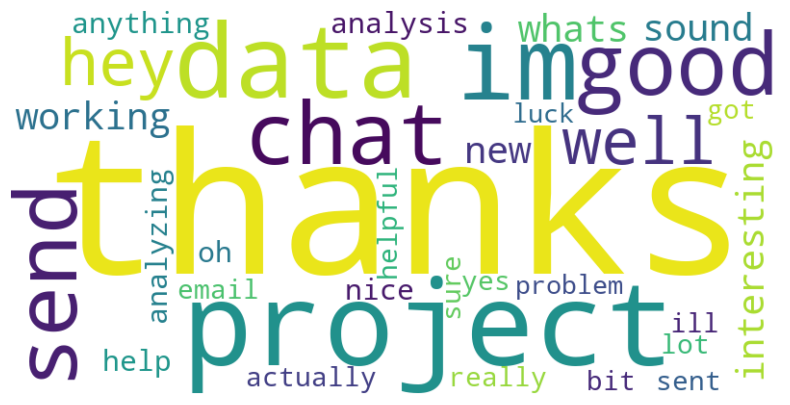

                                Cleaned_Message  Sentiment
0                                           hey   0.000000
1                                im good thanks   0.450000
2                   im well working new project   0.136364
3               sound interesting whats project   0.450000
4  data analysis project im analyzing chat data   0.000000
count    13.000000
mean      0.225874
std       0.246703
min       0.000000
25%       0.000000
50%       0.200000
75%       0.450000
max       0.700000
Name: Sentiment, dtype: float64


In [30]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Main analysis function
def analyze_whatsapp_chat(filepath):
    # Load chat data
    chat_data = load_chat_data(filepath)
    print("Chat data loaded.")
    
    # Preprocess chat data
    df_chat = preprocess_chat_data(chat_data)
    print("Chat data preprocessed.")
    
    # Convert Date column to datetime
    df_chat['Date'] = pd.to_datetime(df_chat['Date'], format='%m/%d/%Y')
    print("Date column converted.")
    
    # Clean the messages
    df_chat['Cleaned_Message'] = df_chat['Message'].apply(clean_text)
    print("Messages cleaned.")
    
    # Debugging: Print DataFrame columns
    print("DataFrame columns:", df_chat.columns)
    
    # Create word cloud
    all_cleaned_text = ' '.join(df_chat['Cleaned_Message'])
    create_wordcloud(all_cleaned_text, 'wordcloud.png')
    
    # Perform sentiment analysis
    df_chat['Sentiment'] = df_chat['Cleaned_Message'].apply(get_sentiment)
    
    # Display results
    print(df_chat[['Cleaned_Message', 'Sentiment']].head())
    sentiment_summary = df_chat['Sentiment'].describe()
    print(sentiment_summary)

# Run the analysis on the dummy chat file
analyze_whatsapp_chat('dummy_whatsapp_chat.txt')